In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score, plot_confusion_matrix, accuracy_score

import joblib
from sklearn.model_selection import train_test_split

In [39]:
dataset = pd.read_csv("/home/tintin/Study/Data-science/Statistical-Machine-Learning/Learn-Logistic-Regression/Datasets/iphone_purchase_records.csv")
dataset

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [40]:
X = dataset.iloc[:,[0,1,2]].values
Y = dataset.iloc[:,3].values


In [41]:
# Encoding categorical data
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:,0])


In [42]:
X_train = X[0:300]
X_test = X[300:400]
Y_train = Y[0:300]
Y_test = Y[300:400]

In [43]:
# Feature scaling
SC = StandardScaler()
Scaler = MinMaxScaler()

X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [44]:
# Training model with LogisticRegression
Logistic_Regression_Classifier = LogisticRegression(random_state= 0)
Logistic_Regression_Classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Training model with Decision Tree
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train, Y_train)

0.9966666666666667 0.79


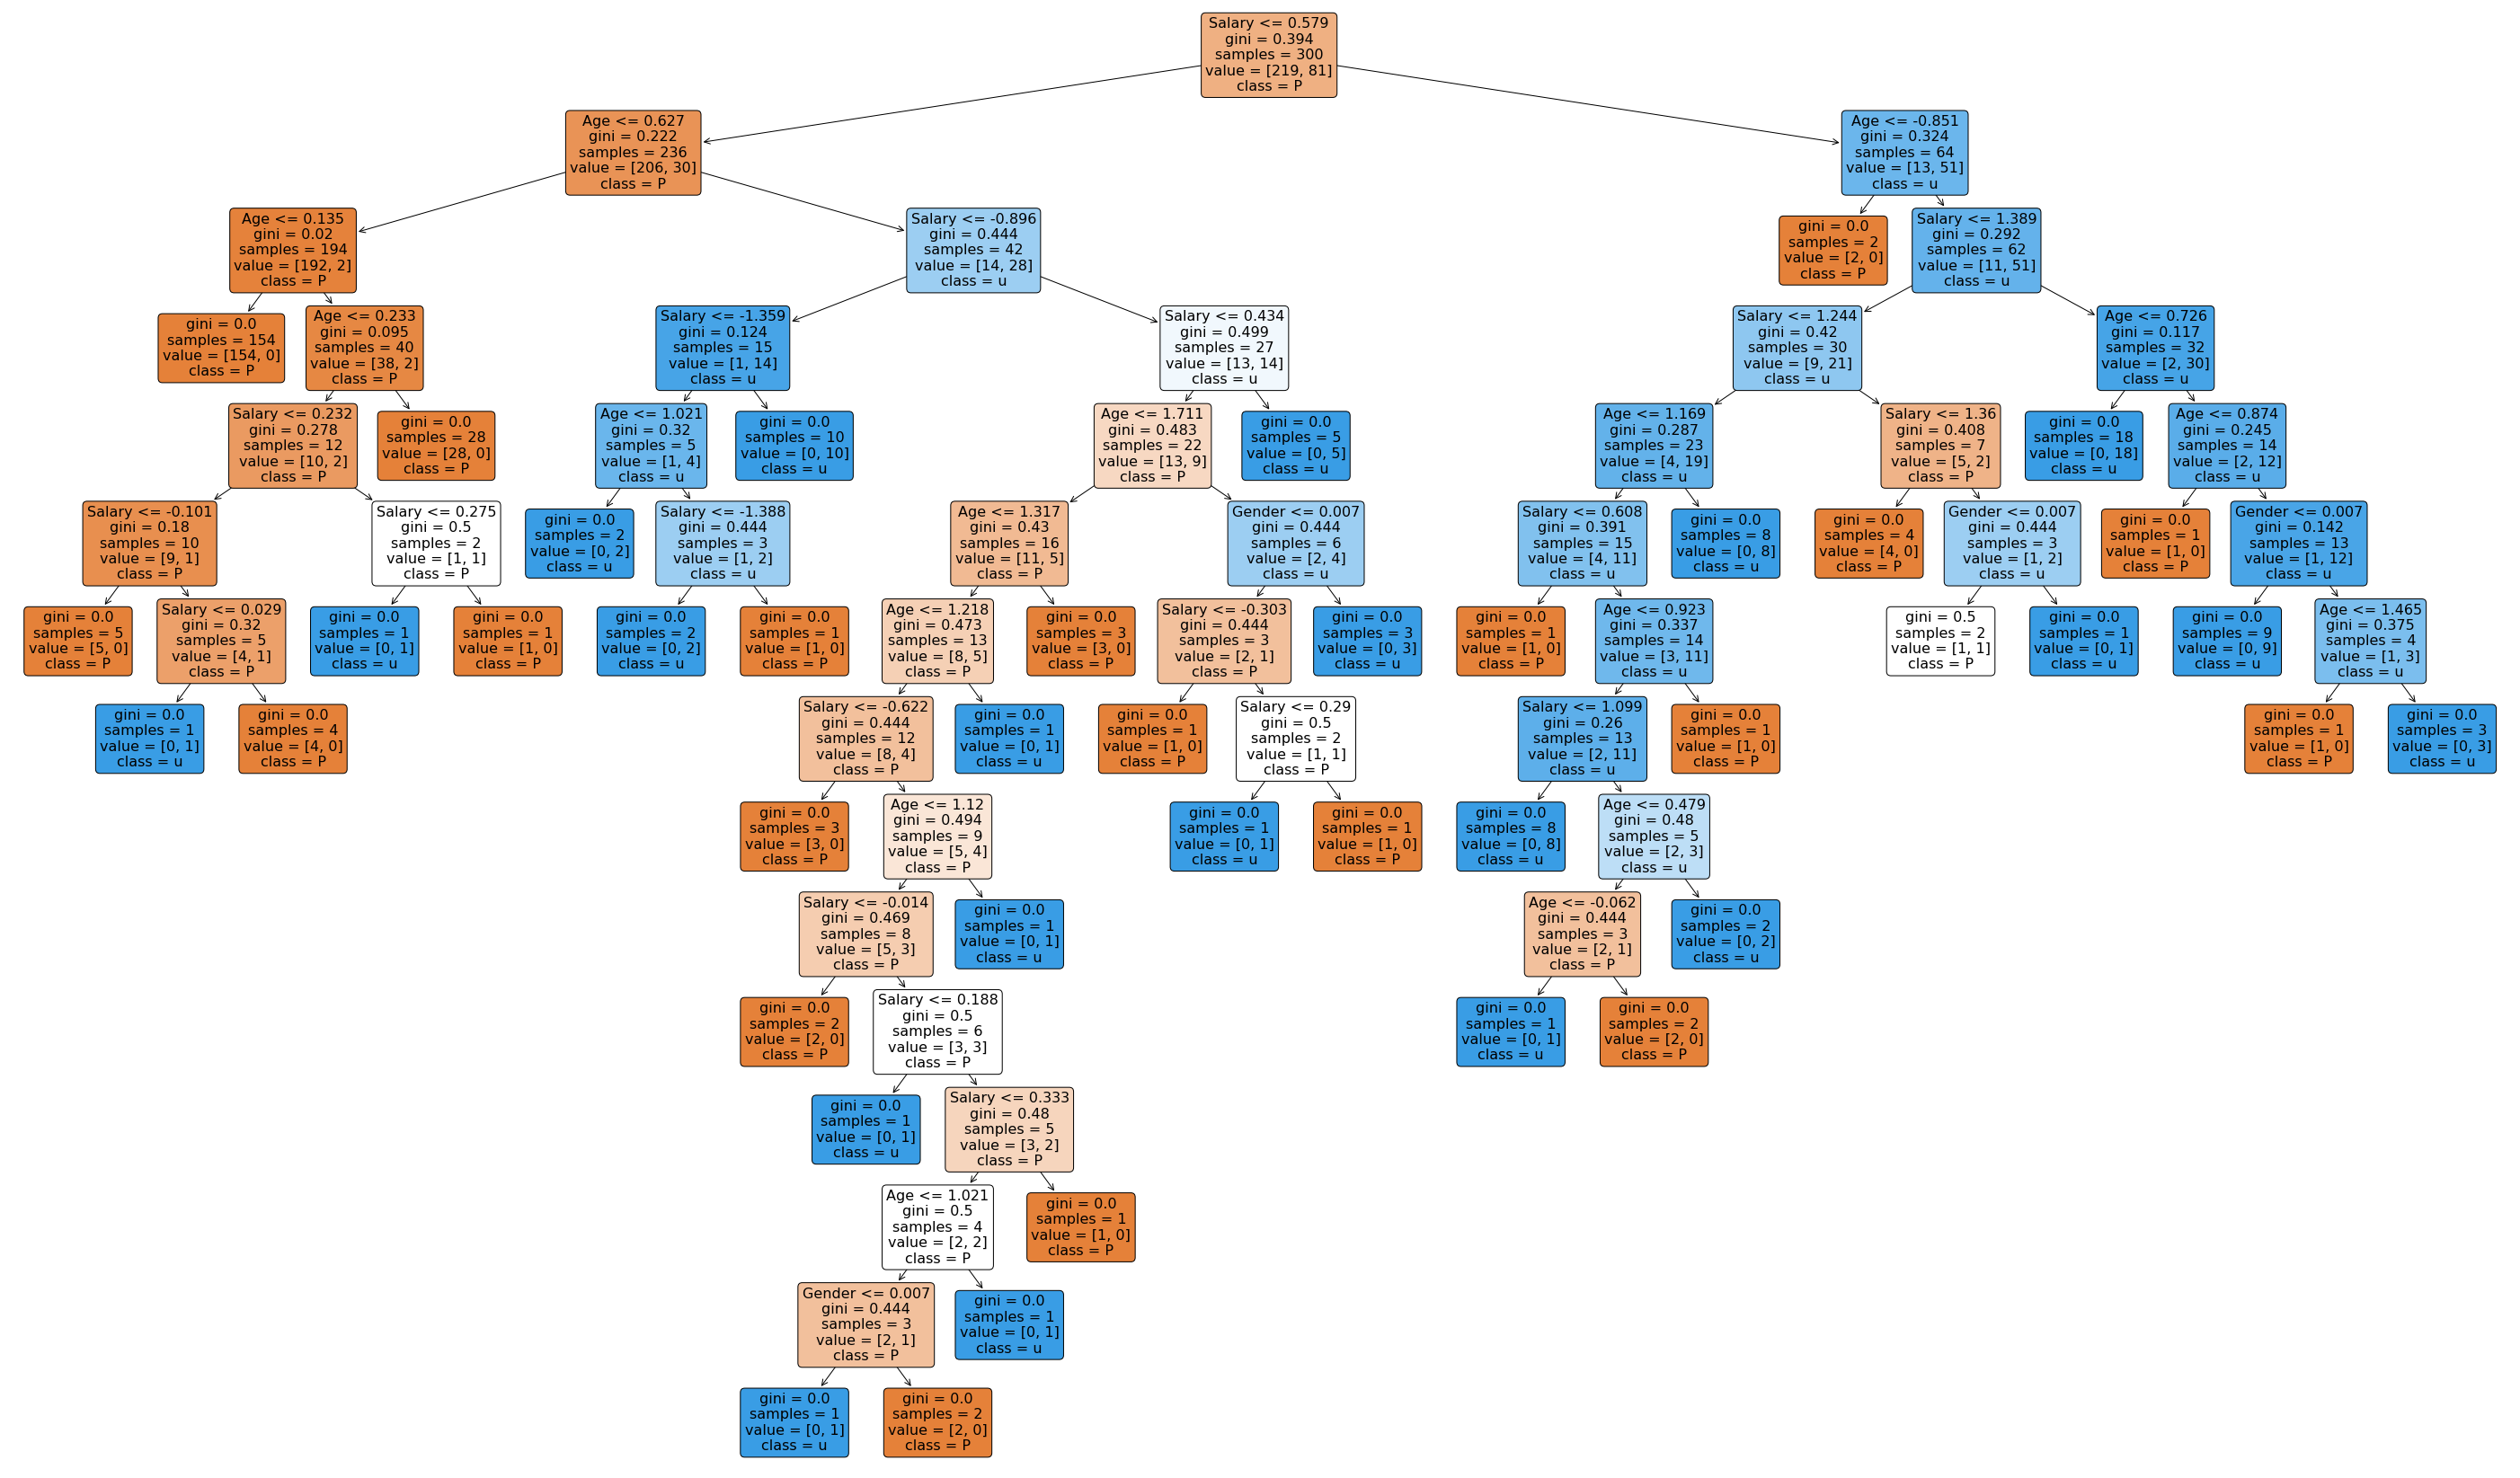

In [46]:
plt.figure(figsize = (50,30))
plot_tree(Decision_Tree_Classifier,
          feature_names=dataset.columns, 
            class_names=dataset.columns[3], 
              filled=True, 
              rounded=True, 
              fontsize=16)
plt.savefig('tree.png')
plt.show()

In [47]:
print('Logistic Regression Model')
cm = confusion_matrix(Y_train, Logistic_Regression_Classifier.predict(X_train))
print("Confusion matrix of training set: ",cm)

cm = confusion_matrix(Y_test, Logistic_Regression_Classifier.predict(X_test))
print("Confusion matrix of testing set: ",cm)


Logistic Regression Model
Confusion matrix of training set:  [[207  12]
 [ 32  49]]
Confusion matrix of testing set:  [[36  2]
 [23 39]]


Text(0.5, 1.0, 'Confusion Matrix of Test Set - Decision Tree')

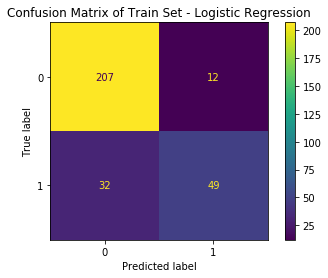

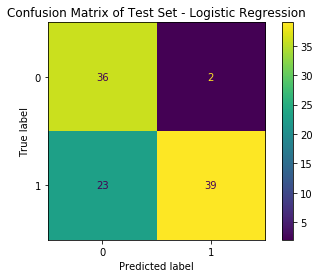

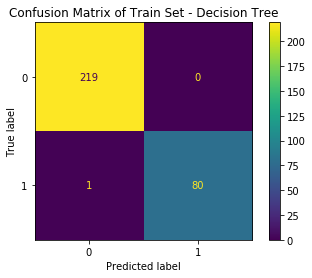

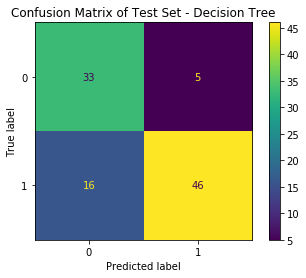

In [48]:
plot_confusion_matrix(Logistic_Regression_Classifier, X_train, Y_train)
plt.title('Confusion Matrix of Train Set - Logistic Regression')

plot_confusion_matrix(Logistic_Regression_Classifier, X_test, Y_test)
plt.title('Confusion Matrix of Test Set - Logistic Regression')

plot_confusion_matrix(Decision_Tree_Classifier, X_train, Y_train)
plt.title('Confusion Matrix of Train Set - Decision Tree')

plot_confusion_matrix(Decision_Tree_Classifier, X_test, Y_test)
plt.title('Confusion Matrix of Test Set - Decision Tree')

In [49]:
print(accuracy_score(Decision_Tree_Classifier.predict(X_train), Y_train))
print(accuracy_score(Decision_Tree_Classifier.predict(X_test), Y_test))

0.9966666666666667
0.79


In [50]:
print(accuracy_score(Logistic_Regression_Classifier.predict(X_train), Y_train))
print(accuracy_score(Logistic_Regression_Classifier.predict(X_test), Y_test))

0.8533333333333334
0.75
